In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# Dataset Overview

In [2]:
c=pd.read_csv("./Desktop/Assgn/transaction_data.csv")
df=pd.DataFrame(c)

df.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06,1.083818e+06
mean,2.410162e+05,6.159417e+06,6.582687e+05,2.865675e+01,9.498798e+00
std,1.423364e+05,1.476341e+05,4.526314e+05,6.542432e+02,2.308139e+03
min,-1.000000e+00,5.900015e+06,-1.000000e+00,-2.429850e+05,-1.526564e+04
25%,2.593920e+05,6.026856e+06,4.609080e+05,3.000000e+00,1.730000e+00
50%,3.020220e+05,6.166611e+06,4.752930e+05,9.000000e+00,2.880000e+00
75%,3.413550e+05,6.289569e+06,4.889430e+05,3.000000e+01,5.700000e+00
max,3.840270e+05,6.397457e+06,1.894494e+06,2.429850e+05,1.696285e+06


In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1083818 non-null int64
TransactionId             1083818 non-null int64
TransactionTime           1083818 non-null object
ItemCode                  1083818 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1083818 non-null int64
CostPerItem               1083818 non-null float64
Country                   1083818 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


# Data Preprocessing
The first step is to drop exact duplicates, in this case every transaction is atleast present twice

In [5]:
prop=df.drop_duplicates(subset=['UserId', 'TransactionId', 'TransactionTime', 'ItemCode', 'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'], keep = 'first')
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,536572.000000,5.365720e+05,5.365720e+05,536572.000000,5.365720e+05
mean,240163.453561,6.159156e+06,6.583921e+05,28.862127,9.560211e+00
std,142690.785461,1.475017e+05,4.528156e+05,657.432645,2.319590e+03
min,-1.000000,5.900015e+06,-1.000000e+00,-242985.000000,-1.526564e+04
25%,-1.000000,6.026856e+06,4.609080e+05,3.000000,1.730000e+00
50%,301098.000000,6.166276e+06,4.752930e+05,9.000000,2.880000e+00
75%,341061.000000,6.288876e+06,4.889430e+05,30.000000,5.700000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


In [6]:
prop=prop[prop['UserId']!=-1]  #Dropping UserId = -1 cases
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,401569.000000,4.015690e+05,4.015690e+05,401569.000000,4.015690e+05
mean,320904.052870,6.166127e+06,6.431912e+05,36.551166,9.024044e+00
std,35994.060839,1.439499e+05,4.342055e+05,750.881750,2.678541e+03
min,259266.000000,5.900015e+06,-1.000000e+00,-242985.000000,0.000000e+00
25%,292719.000000,6.040430e+06,4.618320e+05,6.000000,1.730000e+00
50%,318045.000000,6.179965e+06,4.759230e+05,15.000000,2.700000e+00
75%,352422.000000,6.292385e+06,4.885650e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


In [7]:
prop=prop[prop['ItemCode']!=-1].reset_index(drop=True)   #These have Delivery, Discount etc ItemDescription
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,399788.000000,3.997880e+05,3.997880e+05,399788.000000,3.997880e+05
mean,321057.354368,6.166153e+06,6.460566e+05,36.678217,8.282739e+00
std,35922.934999,1.439601e+05,4.330394e+05,752.417568,2.682775e+03
min,259266.000000,5.900015e+06,4.200000e+01,-242985.000000,0.000000e+00
25%,293139.000000,6.040628e+06,4.626090e+05,6.000000,1.730000e+00
50%,318150.000000,6.180009e+06,4.759860e+05,15.000000,2.700000e+00
75%,352611.000000,6.292385e+06,4.886070e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,242985.000000,1.696285e+06


One big problem we can notice from the above describe is the min and max of 'NumberOfItemsPurchased'.

Below I've listed the UserId's complete transaction history and as we can see its a big problem where a user adds a item to the cart and then cancels it a while later.

In [8]:
prop[prop['UserId']==345366]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
128478,345366,6089303,Mon Jul 30 05:52:00 IST 2018,482622,PANTRY PASTRY BRUSH,3,1.73,United Kingdom
180164,345366,6089303,Mon Jul 30 05:52:00 IST 2018,482580,PANTRY SCRUBBING BRUSH,3,2.28,United Kingdom
232737,345366,6396324,Wed Feb 20 05:27:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",-242985,2.88,United Kingdom
289030,345366,6396313,Wed Feb 20 05:15:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",242985,2.88,United Kingdom


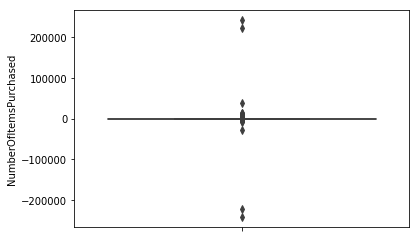

In [9]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

The above Boxplot indicates the same problem of cancelled Transactions still present in Dataset

The function below finds and removes such cancelled Transactions

In [ ]:
def invalidFix(db,Id):
    
    for k in Id['UserId'] :
        temp= db[db['UserId']==k].reset_index()
        neg=temp[temp['NumberOfItemsPurchased'] <0].reset_index(drop=True)

        ind1=temp.index
        ind2=neg.index
        for i in ind2:
            for j in ind1:
                if (np.abs(neg.iloc[i][6])==temp.iloc[j][6]) and (neg.iloc[i][4]==temp.iloc[j][4]) :
                    db.at[neg.iloc[i]['index'],'NumberOfItemsPurchased']= -1 # XX Useless, already negative
                    db.at[temp.iloc[j]['index'],'NumberOfItemsPurchased']= -1
                    break           
            db.at[neg.iloc[i]['index'],'NumberOfItemsPurchased']= -1 # XX Useless, already negative
    
    db=db[db['NumberOfItemsPurchased']>=0]
    
    return db


users=prop.iloc[:][['UserId','NumberOfItemsPurchased']]

users=users[users['NumberOfItemsPurchased']<0]

users=users.drop_duplicates(subset=['UserId'],keep = 'first')
users.drop(users.columns[1], axis = 1, inplace = True) #Produces a list of unique UserIds which have a -ve 'NumberOfItemsPurchased'

prop=invalidFix(prop,users)

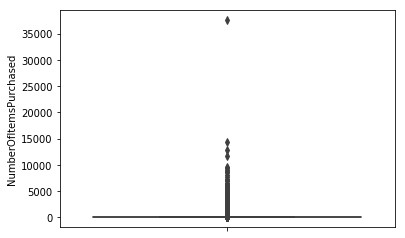

In [297]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

In [283]:
prop.to_csv('newmodified.csv', sep=',') #Saving the output as previous Function takes time and any loss would cost time (inlcude 'index=False' to prevent the hassle below while loading)

In [10]:
new=pd.read_csv('newmodified.csv')
new.head()

,Unnamed: 0,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [11]:
new.drop(new.columns[0],axis=1,inplace=True)
new.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [12]:
new.reset_index(drop=True)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
5,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
6,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
7,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom
8,316848,6262696,Sat Dec 15 10:05:00 IST 2018,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom
9,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom


In [13]:
prop=new.copy() #Back to business
prop

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom
5,345954,6162981,Fri Sep 28 10:51:00 IST 2018,471576,NATURAL SLATE CHALKBOARD LARGE,9,6.84,United Kingdom
6,339822,6255403,Mon Dec 10 09:23:00 IST 2018,1783845,MULTI COLOUR SILVER T-LIGHT HOLDER,36,1.18,United Kingdom
7,328440,6387425,Sat Feb 16 10:35:00 IST 2019,494802,SET OF 6 RIBBONS PERFECTLY PRETTY,36,3.99,United Kingdom
8,316848,6262696,Sat Dec 15 10:05:00 IST 2018,460215,RED HARMONICA IN BOX,36,1.73,United Kingdom
9,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom


In [14]:
prop=prop.reset_index(drop=True)

In [15]:
bad_index = prop[prop['NumberOfItemsPurchased'] > 10000].index  #Dealing with Outliers in 'NumberOfItemsPurchased'
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
105944,278376,6367251,Wed Feb 06 11:57:00 IST 2019,1781346,ASSTD DESIGN 3D PAPER STICKERS,37620,0.00,United Kingdom
230925,275835,6103548,Wed Aug 08 06:52:00 IST 2018,466137,SMALL POPCORN HOLDER,12900,1.00,United Kingdom
250273,379827,5990732,Sun May 06 06:43:00 IST 2018,463113,EMPIRE DESIGN ROSETTE,11718,1.14,United Kingdom
255016,270921,6303088,Tue Jan 08 08:26:00 IST 2019,1765617,WORLD WAR 2 GLIDERS ASSTD DESIGNS,14400,0.29,United Kingdom


In [17]:
for i in bad_index:
    prop.at[i,'NumberOfItemsPurchased'] = 0
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
105944,278376,6367251,Wed Feb 06 11:57:00 IST 2019,1781346,ASSTD DESIGN 3D PAPER STICKERS,0,0.00,United Kingdom
230925,275835,6103548,Wed Aug 08 06:52:00 IST 2018,466137,SMALL POPCORN HOLDER,0,1.00,United Kingdom
250273,379827,5990732,Sun May 06 06:43:00 IST 2018,463113,EMPIRE DESIGN ROSETTE,0,1.14,United Kingdom
255016,270921,6303088,Tue Jan 08 08:26:00 IST 2019,1765617,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0,0.29,United Kingdom


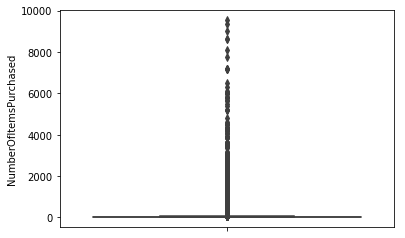

In [18]:
sns.boxplot(y=prop["NumberOfItemsPurchased"])

The above Boxplot doesn't have outliers but looks like this because of the skewness of the data

In [19]:
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,388292.000000,3.882920e+05,3.882920e+05,388292.000000,3.882920e+05
mean,321230.435296,6.166738e+06,6.458944e+05,37.896173,8.335334e+00
std,35911.886600,1.439931e+05,4.329413e+05,121.270385,2.722198e+03
min,259287.000000,5.900015e+06,4.200000e+01,0.000000,0.000000e+00
25%,293349.000000,6.041662e+06,4.625460e+05,6.000000,1.730000e+00
50%,318339.000000,6.180768e+06,4.759650e+05,18.000000,2.700000e+00
75%,352695.000000,6.292803e+06,4.886910e+05,36.000000,5.180000e+00
max,384027.000000,6.397457e+06,1.894494e+06,9558.000000,1.696285e+06


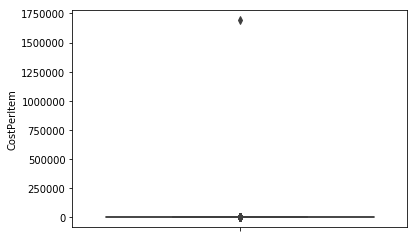

In [20]:
sns.boxplot(y=prop["CostPerItem"])

The above Boxplot shows the outlier

In [21]:
bad_index = prop[prop['CostPerItem'] > 10000].index  #Dealing with the outliers in 'CostPerItem'
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
196335,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,1696285.44,United Kingdom


In [22]:
for i in bad_index:
    prop.at[i,'CostPerItem'] = np.NaN
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
196335,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,NaN,United Kingdom


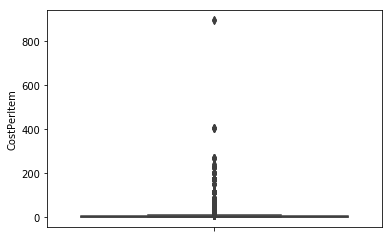

In [23]:
sns.boxplot(y=prop["CostPerItem"])

In [24]:
bad_index = prop[prop['CostPerItem'] > 500].index
prop.iloc[bad_index,:]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
84695,317058,6120884,Wed Aug 22 11:28:00 IST 2018,472542,PICNIC BASKET WICKER 60 PIECES,180,896.31,United Kingdom
139783,317058,6120906,Wed Aug 22 11:33:00 IST 2018,472542,PICNIC BASKET WICKER 60 PIECES,3,896.31,United Kingdom


The above transactions don't look like outliers, just expensive products. Hence, keeping them.

In [25]:
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,388292.000000,3.882920e+05,3.882920e+05,388292.000000,388291.000000
mean,321230.435296,6.166738e+06,6.458944e+05,37.896173,3.966763
std,35911.886600,1.439931e+05,4.329413e+05,121.270385,5.810548
min,259287.000000,5.900015e+06,4.200000e+01,0.000000,0.000000
25%,293349.000000,6.041662e+06,4.625460e+05,6.000000,1.730000
50%,318339.000000,6.180768e+06,4.759650e+05,18.000000,2.700000
75%,352695.000000,6.292803e+06,4.886910e+05,36.000000,5.180000
max,384027.000000,6.397457e+06,1.894494e+06,9558.000000,896.310000


Notice the min of 'ItemCode' which is way below 25%, hence checking it 

In [26]:
prop[prop['ItemCode'] < 10000]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
5610,280749,5917593,Tue Feb 20 07:30:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
13572,313131,6377448,Mon Feb 11 11:08:00 IST 2019,42,CARRIAGE,3,69.0,EIRE
14070,280098,6147988,Sun Sep 16 05:06:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
18655,280812,6228871,Fri Nov 23 08:46:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
22731,280350,6361454,Mon Feb 04 12:33:00 IST 2019,42,CARRIAGE,3,69.0,United Kingdom
27662,280350,6243941,Mon Dec 03 09:33:00 IST 2018,42,CARRIAGE,3,69.0,United Kingdom
28548,297276,6323251,Sat Jan 19 07:42:00 IST 2019,42,CARRIAGE,3,69.0,EIRE
32542,313131,6011951,Sat May 26 11:11:00 IST 2018,42,CARRIAGE,3,69.0,EIRE
32638,313131,6037438,Sat Jun 16 09:29:00 IST 2018,42,CARRIAGE,3,69.0,EIRE
36264,313131,6359023,Sun Feb 03 13:21:00 IST 2019,42,CARRIAGE,3,69.0,EIRE


In [27]:
prop=prop[prop['ItemCode'] > 10000]   #Removing the CARRIAGE transactions too
prop.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,388160.000000,3.881600e+05,3.881600e+05,388160.000000,388159.000000
mean,321235.558414,6.166738e+06,6.461141e+05,37.908033,3.944583
std,35915.909752,1.439951e+05,4.328510e+05,121.289298,5.680375
min,259287.000000,5.900015e+06,2.100420e+05,0.000000,0.000000
25%,293349.000000,6.041662e+06,4.625670e+05,6.000000,1.730000
50%,318339.000000,6.180768e+06,4.759650e+05,18.000000,2.700000
75%,352695.000000,6.292803e+06,4.886910e+05,36.000000,5.180000
max,384027.000000,6.397457e+06,1.894494e+06,9558.000000,896.310000


In [28]:
prop[prop['ItemCode'] == 492324]  #Luckily my eye caught this too while studying for CARRIAGE codes

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
2232,321090,6305926,Wed Jan 09 08:40:00 IST 2019,492324,Next Day Carriage,3,20.7,United Kingdom
2819,340389,6122314,Sat Aug 25 09:41:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
3261,365022,6266260,Mon Dec 17 09:05:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
6251,370692,6262619,Sat Dec 15 09:03:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
12409,313887,6255821,Mon Dec 10 11:48:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
29065,352947,6167590,Mon Oct 01 08:00:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
40623,379533,6151266,Tue Sep 18 07:12:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
41147,303723,6134491,Mon Sep 03 06:31:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
43637,383565,6255480,Mon Dec 10 10:10:00 IST 2018,492324,Next Day Carriage,3,20.7,United Kingdom
48488,339381,6394696,Tue Feb 19 08:10:00 IST 2019,492324,Next Day Carriage,3,20.7,United Kingdom


In [30]:
prop=prop[prop['ItemCode'] != 492324]

# EDA
Below I explore a few interesting possible segmentations.

## Analysing transactions for some insights

In [31]:
#Below is a function to change the 'TransactionTime' to the format 'Month Year'
def strip(string):
    str1= string.split(' ')[1].strip()
    str2= string.split(' ')[5].strip()
    return (str1+ ' ' +str2)

new=prop.copy()  
new['TransactionTime'] = new['TransactionTime'].apply(strip)
new.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Feb 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Dec 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Feb 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Jun 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Jan 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [32]:
new['TransactionTime'].value_counts()

Jan 2019    56646
Dec 2018    48387
Feb 2019    41801
Nov 2018    29452
Jun 2018    27553
Oct 2018    27545
Aug 2018    26250
Jul 2018    25412
Sep 2018    25067
May 2018    23512
Feb 2018    22047
Apr 2018    20485
Mar 2018    12836
Feb 2028     1089
Name: TransactionTime, dtype: int64

In [33]:
new.reset_index(drop=True)

# Function to fix typo of Feb 2028 as Feb 2018
def FebFix(string):
    
    if string.split(' ')[1].strip()=='2028':
        return 'Feb 2018'
    else:
        return string
    
new['TransactionTime'] = new['TransactionTime'].apply(FebFix)

In [34]:
new['TransactionTime'].value_counts()

Jan 2019    56646
Dec 2018    48387
Feb 2019    41801
Nov 2018    29452
Jun 2018    27553
Oct 2018    27545
Aug 2018    26250
Jul 2018    25412
Sep 2018    25067
May 2018    23512
Feb 2018    23136
Apr 2018    20485
Mar 2018    12836
Name: TransactionTime, dtype: int64

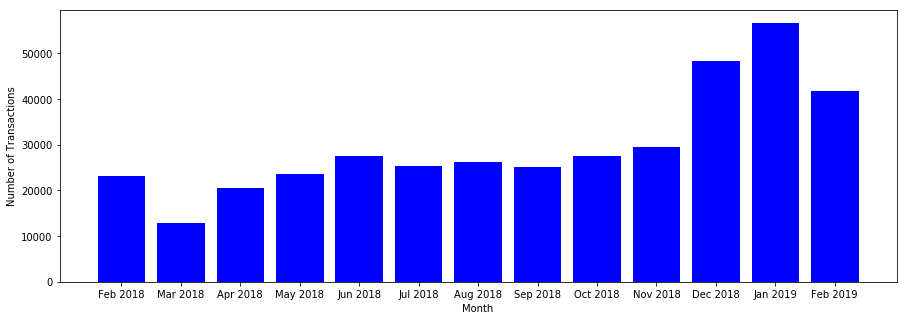

In [35]:
#Dictionary made from the above data, used for displaying the bar graph
dic= {'Feb 2018':23136, 'Mar 2018':12836, 'Apr 2018':20485, 'May 2018':23512, 'Jun 2018':27553, 
       'Jul 2018':25412, 'Aug 2018':26250, 'Sep 2018':25067, 'Oct 2018':27545, 'Nov 2018':29452, 
       'Dec 2018':48387, 'Jan 2019':56646, 'Feb 2019':41801}
fig= plt.figure(figsize=(15,5))
plt.bar(dic.keys(), dic.values(), color='b')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

In [54]:
#Below is a function to change the 'TransactionTime' to the format 'Day'
def strip(string):
    return string.split(' ')[0].strip()

new2=prop.copy()  
new2['TransactionTime'] = new2['TransactionTime'].apply(strip)
new2.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,285957,6307136,Fri,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,United Kingdom


In [55]:
new2['TransactionTime'].value_counts()

Tue    78202
Mon    67313
Sun    63886
Sat    63387
Fri    61861
Wed    53433
Name: TransactionTime, dtype: int64

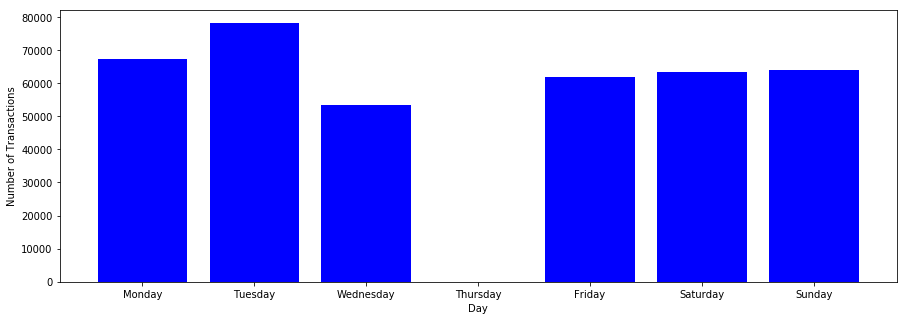

In [56]:
#Dictionary made from the above data, used for displaying the bar graph
dic= {'Monday':67313,'Tuesday':78202,'Wednesday':53433,'Thursday':0,'Friday':61861,'Saturday':63387,'Sunday':63886}
fig= plt.figure(figsize=(15,5))
plt.bar(dic.keys(), dic.values(), color='b')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

One can conclude from the above graph that the records are apparently not kept on Thursdays, maybe an error on the software part.

## Segmentation 1: On the basis of Expenditure

In [36]:
exp=prop.copy()
exp.insert(7, "TotalCost", 0)
exp.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalCost,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,0,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,0,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,0,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,0,United Kingdom
4,285957,6307136,Fri Jan 11 09:50:00 IST 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12,3.52,0,United Kingdom


In [26]:
#A Function to calculate the total cost, simply does NumberOfItemsPurchased*CostPerItem
def CalculateCost(db): 
    for k in range(db.shape[0]) :
        db.iloc[k,7]= (db.iloc[k][5])*(db.iloc[k][6])
    return db

exp=CalculateCost(exp)
exp.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalCost,Country
0,278166,6355745,Feb 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6.0,11.73,70.38,United Kingdom
1,337701,6283376,Dec 2018,482370,LONDON BUS COFFEE MUG,3.0,3.52,10.56,United Kingdom
2,267099,6385599,Feb 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72.0,0.90,64.80,France
3,380478,6044973,Jun 2018,459186,UNION JACK FLAG LUGGAGE TAG,3.0,1.73,5.19,United Kingdom
4,285957,6307136,Jan 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12.0,3.52,42.24,United Kingdom


In [27]:
exp.to_csv('modified2.csv', sep=',') #Saving progress

In [46]:
exp=pd.read_csv('modified2.csv')
exp.drop(exp.columns[0],axis=1,inplace=True)
exp.reset_index(drop=True)
exp.head()   #Back to business

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalCost,Country
0,278166,6355745,Feb 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6.0,11.73,70.38,United Kingdom
1,337701,6283376,Dec 2018,482370,LONDON BUS COFFEE MUG,3.0,3.52,10.56,United Kingdom
2,267099,6385599,Feb 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72.0,0.90,64.80,France
3,380478,6044973,Jun 2018,459186,UNION JACK FLAG LUGGAGE TAG,3.0,1.73,5.19,United Kingdom
4,285957,6307136,Jan 2019,1787247,CUT GLASS T-LIGHT HOLDER OCTAGON,12.0,3.52,42.24,United Kingdom


In [47]:
exp2=exp.groupby('UserId')[['TotalCost']].sum()
exp2=exp2.sort_values('TotalCost', ascending=False)
exp2=exp2.reset_index()
exp2

,UserId,TotalCost
0,307566,1157178.27
1,380142,1076194.08
2,366450,786089.82
3,313131,541579.20
4,260715,513496.50
5,297276,472277.22
6,367731,368571.21
7,350364,273565.05
8,287574,264150.36
9,336609,257394.18


In [48]:
#A look into what the number 1 buyer is buying, in descending order of TotalCost
exp[exp['UserId']==307566].sort_values('TotalCost', ascending=False)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalCost,Country
21697,307566,6303033,Jan 2019,484764,RABBIT NIGHT LIGHT,7200.0,2.88,20736.00,Netherlands
193830,307566,6392925,Feb 2019,484764,RABBIT NIGHT LIGHT,4320.0,2.48,10713.60,Netherlands
368422,307566,6101062,Aug 2018,467103,5 HOOK HANGER RED MAGIC TOADSTOOL,2880.0,2.01,5788.80,Netherlands
312989,307566,6292572,Jan 2019,474495,GINGHAM HEART DECORATION,5184.0,1.00,5184.00,Netherlands
19825,307566,6028121,Jun 2018,475230,DOLLY GIRL LUNCH BOX,1920.0,2.28,4377.60,Netherlands
173780,307566,6028121,Jun 2018,475209,SPACEBOY LUNCH BOX,1920.0,2.28,4377.60,Netherlands
374749,307566,6211172,Nov 2018,484764,RABBIT NIGHT LIGHT,1440.0,2.88,4147.20,Netherlands
279706,307566,6190679,Oct 2018,488040,SET OF 4 KNICK KNACK TINS DOILEY,720.0,5.18,3729.60,Netherlands
78436,307566,6211150,Nov 2018,475209,SPACEBOY LUNCH BOX,1344.0,2.28,3064.32,Netherlands
146023,307566,6211150,Nov 2018,475230,DOLLY GIRL LUNCH BOX,1344.0,2.28,3064.32,Netherlands


In [49]:
exp2.insert(2, "Label", 'Unknown')
exp2

,UserId,TotalCost,Label
0,307566,1157178.27,Unknown
1,380142,1076194.08,Unknown
2,366450,786089.82,Unknown
3,313131,541579.20,Unknown
4,260715,513496.50,Unknown
5,297276,472277.22,Unknown
6,367731,368571.21,Unknown
7,350364,273565.05,Unknown
8,287574,264150.36,Unknown
9,336609,257394.18,Unknown


In [50]:
exp2.describe()

,UserId,TotalCost
count,4324.000000,4.324000e+03
mean,321291.316374,8.001205e+03
std,36129.938282,3.457584e+04
min,259287.000000,0.000000e+00
25%,290088.750000,1.248705e+03
50%,321268.500000,2.714820e+03
75%,352322.250000,6.684495e+03
max,384027.000000,1.157178e+06


In [51]:
#A Function to label each user according to the expenditure
def MoneyLabelling(db): 
    for k in range(db.shape[0]) :
        if db.iloc[k]['TotalCost'] < 500:
            db.iloc[k,2]='Very Small'      
        elif db.iloc[k]['TotalCost'] < 2000:
            db.iloc[k,2]='Small'
        elif db.iloc[k]['TotalCost'] < 5000:
            db.iloc[k,2]='Normal'     
        elif db.iloc[k]['TotalCost'] < 50000:
            db.iloc[k,2]='Big'  
        elif db.iloc[k]['TotalCost'] < 500000:
            db.iloc[k,2]='Very Big' 
        else:
            db.iloc[k,2]='Whales'
            
    return db

exp2=MoneyLabelling(exp2)
exp2

,UserId,TotalCost,Label
0,307566,1157178.27,Whales
1,380142,1076194.08,Whales
2,366450,786089.82,Whales
3,313131,541579.20,Whales
4,260715,513496.50,Whales
5,297276,472277.22,Very Big
6,367731,368571.21,Very Big
7,350364,273565.05,Very Big
8,287574,264150.36,Very Big
9,336609,257394.18,Very Big


In [52]:
exp2.groupby('Label')[['UserId']].count()

,UserId
Label,
Big,1324
Normal,1183
Small,1467
Very Big,67
Very Small,278
Whales,5


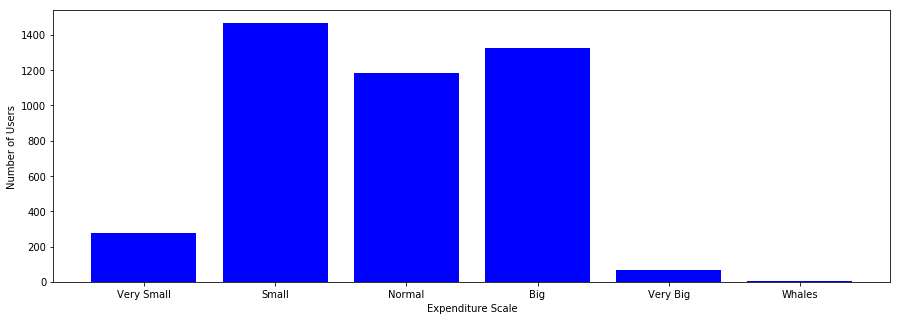

In [53]:
#Dictionary made from above data to plot the bar graph below
dic= {'Very Small':278,'Small':1467, 'Normal':1183, 'Big':1324, 'Very Big':67, 'Whales':5}
fig= plt.figure(figsize=(15,5))
plt.bar(dic.keys(), dic.values(), color='b')
plt.xlabel('Expenditure Scale')
plt.ylabel('Number of Users')
plt.show()

## Segmentation 2: Based on frequency of shopping 

In [57]:
new2=exp.groupby('UserId')[['TransactionTime']].nunique()

new2.rename(columns = {'TransactionTime':'Frequency(Months)'}, inplace=True)
new2=new2.sort_values('Frequency(Months)', ascending=False)
new2

,Frequency(Months)
UserId,
372897,13
316638,13
287574,13
315105,13
344862,13
281568,13
297276,13
325458,13
321531,13


In [58]:
new2.insert(1, "Label", 'Unknown')

In [59]:
new2=new2.reset_index()
new2

,UserId,Frequency(Months),Label
0,372897,13,Unknown
1,316638,13,Unknown
2,287574,13,Unknown
3,315105,13,Unknown
4,344862,13,Unknown
5,281568,13,Unknown
6,297276,13,Unknown
7,325458,13,Unknown
8,321531,13,Unknown
9,371175,13,Unknown


In [60]:
def Labelling(db): 
    for k in range(db.shape[0]) :
        if db.iloc[k]['Frequency(Months)']==13:
            db.iloc[k,2]='Regular'      
        elif db.iloc[k]['Frequency(Months)']>=6:
            db.iloc[k,2]='Frequent'
        elif db.iloc[k]['Frequency(Months)']>1:
            db.iloc[k,2]='Occasional'            
        else:
            db.iloc[k,2]='One-Timer' 
            
    return db

new2=Labelling(new2)
new2

,UserId,Frequency(Months),Label
0,372897,13,Regular
1,316638,13,Regular
2,287574,13,Regular
3,315105,13,Regular
4,344862,13,Regular
5,281568,13,Regular
6,297276,13,Regular
7,325458,13,Regular
8,321531,13,Regular
9,371175,13,Regular


In [61]:
exp3=new2.groupby('Label')['UserId'].count()
exp3

Label
Frequent       583
Occasional    2065
One-Timer     1633
Regular         43
Name: UserId, dtype: int64

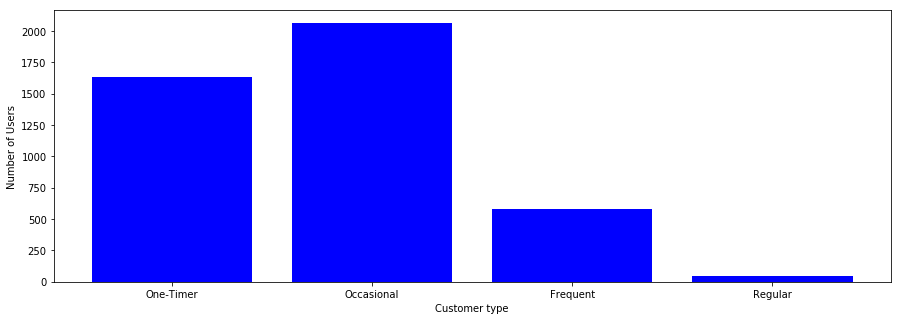

In [62]:
#Dictionary made from above data to plot the bar graph below
dic= {'One-Timer':1633,'Occasional':2065,'Frequent':583,'Regular':43}
fig= plt.figure(figsize=(15,5))
plt.bar(dic.keys(), dic.values(), color='b')
plt.xlabel('Customer type')
plt.ylabel('Number of Users')
plt.show()

In [68]:
#Function to produce the output
def Grouping(db): 
    
    OT=[]
    OC=[]
    RE=[]
    FR=[]
    
    for k in range(db.shape[0]) :
        if db.iloc[k]['Label']=='One-Timer':
            OT.append(db.iloc[k,0])    
        elif db.iloc[k]['Label']=='Occasional':
            OC.append(db.iloc[k,0]) 
        elif db.iloc[k]['Label']=='Frequent':
            FR.append(db.iloc[k,0])         
        else:
            RE.append(db.iloc[k,0])

    with open('output.csv', mode='w', newline='') as file:

        fieldnames = ['Type of Customer' ,'UserId']
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
    
        writer.writerow({'Type of Customer': 'One-Time Customers', 'UserId': ", ".join(str(x) for x in OT)})
        writer.writerow({'Type of Customer': 'Occasional Customers', 'UserId': ", ".join(str(x) for x in OC)})
        writer.writerow({'Type of Customer': 'Frequent Customers' , 'UserId': ", ".join(str(x) for x in FR)})
        writer.writerow({'Type of Customer': 'Regular Customers' , 'UserId': ", ".join(str(x) for x in RE)})

Grouping(new2)

In [69]:
op=pd.read_csv('output.csv')
op   #Displaying the final output

,Type of Customer,UserId
0,One-Time Customers,"378315, 382032, 382074, 269745, 379050, 269787..."
1,Occasional Customers,"346815, 304815, 309561, 283479, 345954, 346437..."
2,Frequent Customers,"318339, 263340, 274050, 273084, 332976, 378861..."
3,Regular Customers,"372897, 316638, 287574, 315105, 344862, 281568..."
